## Task 1: Sentiment Analysis of BA Customers Reviews 

In [97]:
# Imports 
import re 
import string
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
# load data 
reviews = pd.read_csv("data/BA_Reviews.csv")
# show a sample of reviews 
reviews.head()

,Review
0,Not Verified | I was meant to fly in January t...
1,✅ Trip Verified | We have flown repeatedly wi...
2,✅ Trip Verified | I was horrified by the extr...
3,✅ Trip Verified | \r\nThe worst cabin experie...
4,✅ Trip Verified | First time flying with Briti...


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3542 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


### Text Cleaning and Preprocessing

The reviews texts at hand are very messy and before we progress with any analysis, we have to clean the texts from punctuations, digits, tags, http link, special characters, emojis, etc. After that we need to perform some prprocessing tasks such as tokenization, stopwords removal, stemming, etc. 

In [100]:
# define a function to clean the text 
def clean(text):
    if '|' in text:
        text = text.split('|')[1]
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[^\w\s]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
def preprocess(text): 
    #get english stops words 
    stop_words = set(stopwords.words("english")) 
    lemmatizer = WordNetLemmatizer()
    #tokenize text 
    word_tokens = word_tokenize(text) 
    #remove stop words 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    #stemming the text 
    preprocessed_text=[lemmatizer.lemmatize(word) for word in filtered_text if len(word)>2]
    # join text again
    final_text = " ".join(preprocessed_text).strip()
    return final_text

In [101]:
# copy the dataframe and launch cleaning and preprocessing tasks 
df = reviews.copy()
df['Preprocessed_review'] = df['Review'].apply(clean).apply(preprocess)
df.head()

,Review,Preprocessed_review
0,Not Verified | I was meant to fly in January t...,meant fly january algeria paid ticket day mean...
1,✅ Trip Verified | We have flown repeatedly wi...,flown repeatedly british airway one world alli...
2,✅ Trip Verified | I was horrified by the extr...,horrified extremely small seat poor training c...
3,✅ Trip Verified | \r\nThe worst cabin experie...,worst cabin experience ever cramped seat low c...
4,✅ Trip Verified | First time flying with Briti...,first time flying british airway first time fl...


In [68]:
# compare text and cleaned text 
from random import randrange
n = randrange(len(df))
print(" Review:\n", df.Review[n])
print('\n')
print(" Preprocessed Review:\n", df.Preprocessed_review[n])

 Review:
 ✅ Trip Verified |  Prague to Denver via London. I almost missed my flight because at check-in I had to complete some really important papers that took 40 minutes -  later, no one asked me for those papers. Flight to Heathrow was average, what you expect from a 2 hour flight. At Heathrow the security lasted me  30 minutes. When I boarded the next the plane a lack of leg room, it was less than the flight before.  The flight then was pretty much okay, the food was delicious, had pasta with tomato sauce and several times drinks, the flight staff was kind and helpful. But the plane had no paid Wi-Fi, no outlets or USB ports, the screens were low quality.


 Preprocessed Review:
 prague denver via london almost missed flight checkin complete really important paper took minute later one asked paper flight heathrow average expect hour flight heathrow security lasted minute boarded next plane lack leg room le flight flight pretty much okay food delicious pasta tomato sauce several tim

### Sentiment Analysis 

In [113]:
# define a function 
def analyzer(text):
    sia = SentimentIntensityAnalyzer()
    if sia.polarity_scores(text)['compound']>0:
        return 'positive'
    elif sia.polarity_scores(text)['compound']<0:
        return 'negative'
    else:
        return 'netural'
    

# perform sentiment analysis  
df['Sentiment'] = df['Preprocessed_review'].apply(analyzer)
# show a sample 
df.sample(5)

,Review,Preprocessed_review,Sentiment
994,✅ Trip Verified | I took the new option of the...,took new option new toronto london gatwick deb...,positive
796,✅ Trip Verified | \r\nThe 2-3-2 seating in the...,seating front section club world upper deck fe...,positive
1376,✅ Verified Review | I was a bit nervous when ...,bit nervous booked bristish airway return flig...,positive
1865,"✅ Verified Review | Tokyo Haneda to London, a...",tokyo haneda london british airway cost cuttin...,negative
337,✅ Trip Verified | Very efficient evening bag ...,efficient evening bag drop security quick gall...,positive


In [115]:
# how many reviews in each sentiment class
df.Sentiment.value_counts()

positive    2340
negative    1148
netural       54
Name: Sentiment, dtype: int64

### Sentiment Visualization

In [112]:
neg = len(df[df.Sentiment =="negative"])
pos = len(df[df.Sentiment =="positive"])
rate_neg =round( neg/len(df), 2)*100
rate_pos = round(pos/len(df), 2)*100
print(f"Percentage of Positive Reviews: {rate_pos}%")
print(f"Percentage of Negative Reviews: {rate_neg}%")
results = pd.DataFrame({"Sentiment":["Positive", "Negative"], "Percentage":[rate_pos, rate_neg]})
results

Percentage of Positive Reviews: 66.0%
Percentage of Negative Reviews: 32.0%


,Sentiment,Percentage
0,Positive,66.0
1,Negative,32.0


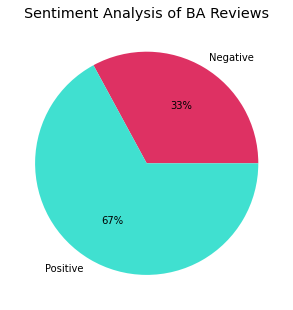

In [119]:
# plot as a pie chart 
data = [neg, pos] 
labels = ["Negative", "Positive"]
colors = ["#DE3163","#40E0D0"]
# define figure size
fig = plt.figure(figsize=(5,6))

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Sentiment Analysis of BA Reviews")
plt.show()
fig.savefig("sentiments.png", dpi=300)

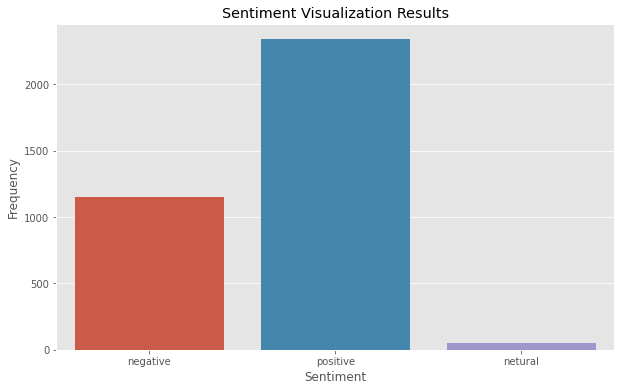

In [103]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Visualization Results")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.show()

### Wordclouds and Sentiment Analysis

In [104]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(text, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(text))

    fig = plt.figure(1, figsize=(16, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title(title)
    plt.show()

#filter positive reviews 
list_pos_reviews = df[df.Sentiment=='positive']['Preprocessed_review'].tolist()
pos_reviews = " ".join(list_pos_reviews)
#filter negative reviews 
list_neg_reviews = df[df.Sentiment=='negative']['Preprocessed_review'].tolist()
neg_reviews = " ".join(list_neg_reviews)

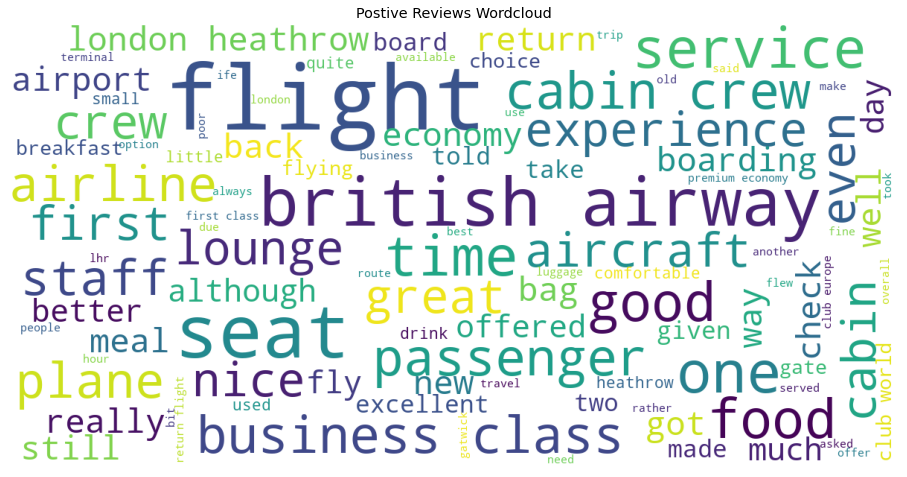

In [105]:
# show wordcloud for positive reviews 
show_wordcloud(pos_reviews,title="Postive Reviews Wordcloud")

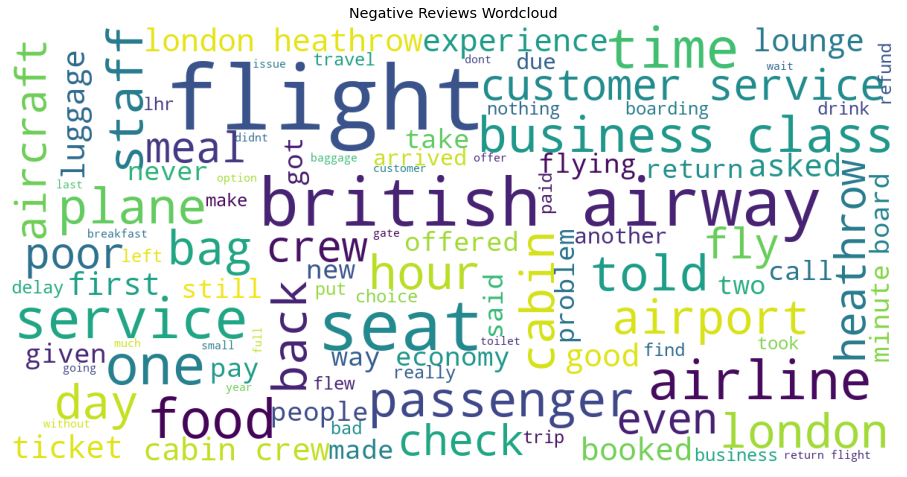

In [106]:
# show wordcloud for positive reviews 
show_wordcloud(neg_reviews,title="Negative Reviews Wordcloud")